In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [5]:
INPUT_TRAIN = '../input/train.csv'
INPUT_TEST = '../input/test.csv'
OUTPUT_SUBMIT = '../output/submit.csv'

In [6]:
df = pd.read_csv(INPUT_TRAIN, nrows=550000)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
test = pd.read_csv(INPUT_TEST)
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 8 columns):
key                  550000 non-null object
fare_amount          550000 non-null float64
pickup_datetime      550000 non-null object
pickup_longitude     550000 non-null float64
pickup_latitude      550000 non-null float64
dropoff_longitude    549994 non-null float64
dropoff_latitude     549994 non-null float64
passenger_count      550000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 33.6+ MB


In [9]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,550000.000000,550000.000000,550000.000000,549994.000000,549994.000000,550000.000000
mean,11.348953,-72.527701,39.922421,-72.524337,39.917940,1.683707
std,9.883326,12.545991,7.950921,11.692485,7.297479,1.307607
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-2559.748913,0.000000
25%,6.000000,-73.992043,40.734942,-73.991390,40.734060,1.000000
50%,8.500000,-73.981790,40.752681,-73.980141,40.753135,1.000000
75%,12.500000,-73.967108,40.767092,-73.963602,40.768124,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [10]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    6
dropoff_latitude     6
passenger_count      0
dtype: int64

In [11]:
df = df.dropna()
df.shape

(549994, 8)

# preprocessing for fare_amount

In [12]:
df = df[df['fare_amount'] > 0]
df.shape

(549954, 8)

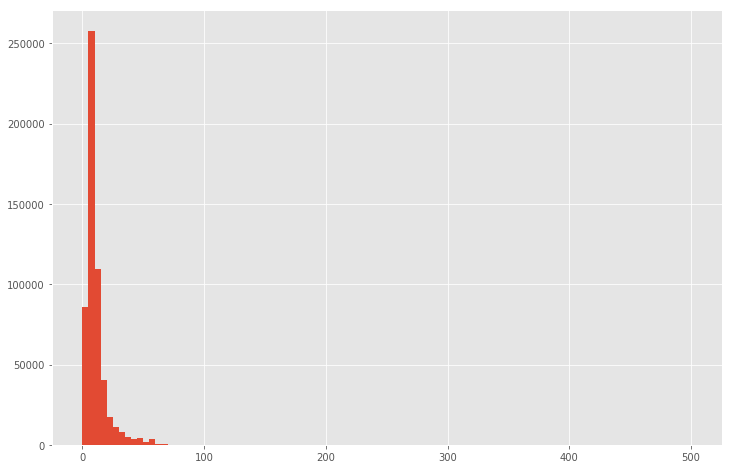

In [13]:
plt.figure(figsize=(12,8))
plt.hist(df['fare_amount'], bins=100)
plt.show()

In [14]:
df = df[df['fare_amount'] < 100]
df.shape

(549707, 8)

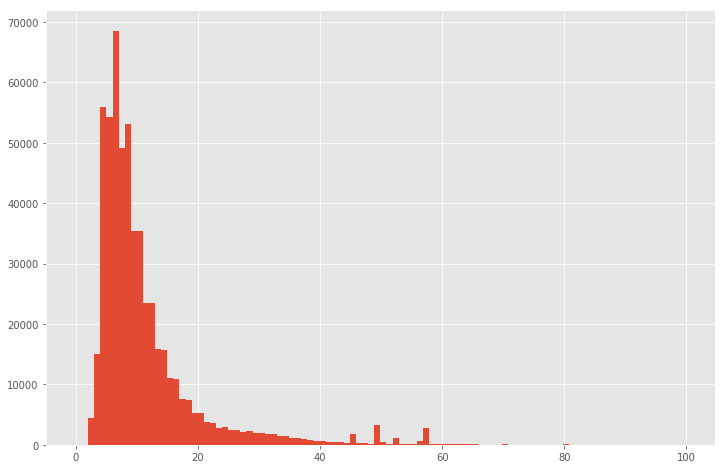

In [15]:
plt.figure(figsize=(12,8))
plt.hist(df['fare_amount'], bins=100)
plt.show()

In [16]:
def outlier_iqr(df, columns=None):
    if columns == None:
        columns = df.columns

    for col in columns:
        q1 = df[col].describe()['25%']
        q3 = df[col].describe()['75%']
        #四分位範囲
        iqr = q3 - q1 
        
        outlier_min = q1 - iqr * 1.5
        outlier_max = q3 + iqr * 1.5

        df = df[(df[col] >= outlier_min) & (df[col] <= outlier_max)]
        
    return df


In [17]:
print('before', df.shape)
df = outlier_iqr(df, columns=['fare_amount'])
print('after', df.shape)

before (549707, 8)
after (502410, 8)


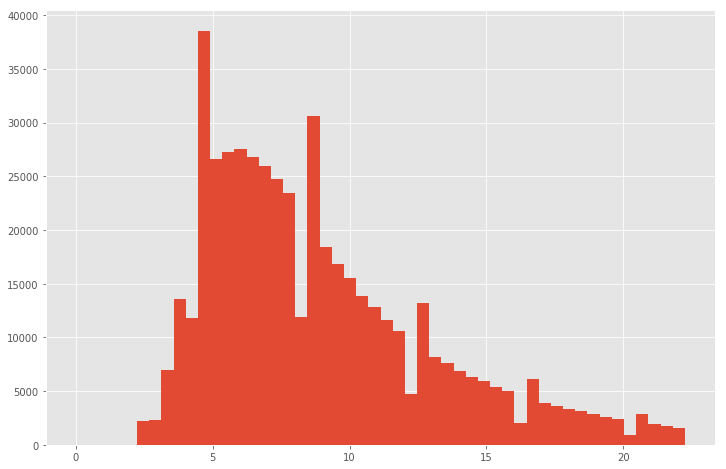

In [18]:
plt.figure(figsize=(12,8))
plt.hist(df['fare_amount'], bins=50)
plt.show()

# preprocessing for latitude and longitude

In [19]:
print('before', df.shape)
df = df[(df['pickup_longitude'] > -75) & (df['pickup_longitude'] < -73)]
df = df[(df['pickup_latitude'] > 40) & (df['pickup_latitude'] < 42)]
df = df[(df['dropoff_longitude'] > -75) & (df['dropoff_longitude'] < -73)]
df = df[(df['dropoff_latitude'] > 40) & (df['dropoff_latitude'] < 42)]
print('after', df.shape)

before (502410, 8)
after (492133, 8)


# preprocessing for passenger_count

In [20]:
df['passenger_count'].value_counts()

1    341337
2     72056
5     34752
3     21456
4     10411
6     10253
0      1868
Name: passenger_count, dtype: int64

In [21]:
print('before', df.shape)
df = df[df['passenger_count'] > 0]
print('after', df.shape)

before (492133, 8)
after (490265, 8)


In [22]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,490265.000000,490265.000000,490265.000000,490265.000000,490265.000000,490265.000000
mean,8.933894,-73.979709,40.752227,-73.978072,40.752539,1.686310
std,4.139031,0.028164,0.027131,0.028387,0.028941,1.303497
min,0.010000,-74.968142,40.052722,-74.964263,40.041180,1.000000
25%,5.700000,-73.992532,40.737282,-73.991863,40.737189,1.000000
50%,8.000000,-73.982429,40.753330,-73.981329,40.753990,1.000000
75%,11.000000,-73.970177,40.766867,-73.967958,40.767942,2.000000
max,22.250000,-73.036247,41.800252,-73.029770,41.923820,6.000000


# add new features from latitude and longitude

In [23]:
def calculation_distance(x_1, y_1, x_2, y_2):
    # 赤道半径 (km)
    R = 6371
    # Radian角に変換
    _x1, _y1, _x2, _y2  = map(np.radians, [x_1, y_1, x_2, y_2])
    
    delta_x = _x2 - _x1
    delta_y = _y2 - _y1
    
    # 距離を計算
    a = np.sin(delta_y/2.0)**2 + np.cos(_y1) * np.cos(_y2) * np.sin(delta_x/2.0)**2
    return 2 * R * np.arcsin(np.sqrt(a))

def calculation_azimuth(x_1, y_1, x_2, y_2):
    # Radian角に修正
    _x1, _y1, _x2, _y2 = map(np.radians, [x_1, y_1, x_2, y_2])
    
    delta_x = _x2 - _x1
    _y = np.sin(delta_x)
    _x = np.cos(_y1) * np.tan(_y2) - np.sin(_y1) * np.cos(delta_x)

    psi = np.rad2deg(np.arctan2(_y, _x))
    
    return np.where(psi < 0, 360 + psi, psi)


In [24]:
df['distance'] = calculation_distance(df['pickup_longitude'],
                                      df['pickup_latitude'],
                                      df['dropoff_longitude'],
                                      df['dropoff_latitude'])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [25]:
df['azimuth'] = calculation_azimuth(df['pickup_longitude'],
                                      df['pickup_latitude'],
                                      df['dropoff_longitude'],
                                      df['dropoff_latitude'])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,azimuth
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,167.240469
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,21.498365
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,211.033211
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,352.327836
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,28.802783


# modify data type

In [26]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490265 entries, 0 to 549999
Data columns (total 10 columns):
key                  490265 non-null object
fare_amount          490265 non-null float64
pickup_datetime      490265 non-null datetime64[ns]
pickup_longitude     490265 non-null float64
pickup_latitude      490265 non-null float64
dropoff_longitude    490265 non-null float64
dropoff_latitude     490265 non-null float64
passenger_count      490265 non-null int64
distance             490265 non-null float64
azimuth              490265 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 41.1+ MB


In [27]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,azimuth
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,167.240469
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,21.498365
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,211.033211
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,352.327836
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,28.802783


In [28]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['year'] = df['pickup_datetime'].dt.year

df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,azimuth,hour,day,month,dayofweek,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,167.240469,17,15,6,0,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,21.498365,16,5,1,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,211.033211,0,18,8,3,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,352.327836,4,21,4,5,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,28.802783,7,9,3,1,2010


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490265 entries, 0 to 549999
Data columns (total 15 columns):
key                  490265 non-null object
fare_amount          490265 non-null float64
pickup_datetime      490265 non-null datetime64[ns]
pickup_longitude     490265 non-null float64
pickup_latitude      490265 non-null float64
dropoff_longitude    490265 non-null float64
dropoff_latitude     490265 non-null float64
passenger_count      490265 non-null int64
distance             490265 non-null float64
azimuth              490265 non-null float64
hour                 490265 non-null int64
day                  490265 non-null int64
month                490265 non-null int64
dayofweek            490265 non-null int64
year                 490265 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(6), object(1)
memory usage: 59.8+ MB


# model

In [30]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [31]:
X = df.drop(columns=['key', 'fare_amount', 'pickup_datetime'])
y = df['fare_amount']

print(X.shape)
print(y.shape)

(490265, 12)
(490265,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(392212, 12)
(98053, 12)
(392212,)
(98053,)


In [34]:
params = {
    'silent' : 1,
    'max_depth' : 6,
    'min_child_weight' : 1,
    'eta' : 0.1,
    'tree_method' : 'exact',
    'objective' : 'reg:linear',
    'eval_metric' : 'rmse',
    'predictor' : 'cpu_predictor'
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(params=params,
                 dtrain=dtrain,
                 num_boost_round=1000,
                 early_stopping_rounds=5,
                 evals=[(dtest, 'test')])

[0]	test-rmse:8.51795
Will train until test-rmse hasn't improved in 5 rounds.
[1]	test-rmse:7.7221
[2]	test-rmse:7.01123
[3]	test-rmse:6.37683
[4]	test-rmse:5.81231
[5]	test-rmse:5.31044
[6]	test-rmse:4.86548
[7]	test-rmse:4.4716
[8]	test-rmse:4.12459
[9]	test-rmse:3.81989
[10]	test-rmse:3.55371
[11]	test-rmse:3.321
[12]	test-rmse:3.11907
[13]	test-rmse:2.94449
[14]	test-rmse:2.7936
[15]	test-rmse:2.66308
[16]	test-rmse:2.5513
[17]	test-rmse:2.45545
[18]	test-rmse:2.37458
[19]	test-rmse:2.30664
[20]	test-rmse:2.24882
[21]	test-rmse:2.19985
[22]	test-rmse:2.15794
[23]	test-rmse:2.12127
[24]	test-rmse:2.0902
[25]	test-rmse:2.06474
[26]	test-rmse:2.04329
[27]	test-rmse:2.02426
[28]	test-rmse:2.0089
[29]	test-rmse:1.99512
[30]	test-rmse:1.98259
[31]	test-rmse:1.97273
[32]	test-rmse:1.96238
[33]	test-rmse:1.95481
[34]	test-rmse:1.94825
[35]	test-rmse:1.94075
[36]	test-rmse:1.9355
[37]	test-rmse:1.92884
[38]	test-rmse:1.92311
[39]	test-rmse:1.91925
[40]	test-rmse:1.91578
[41]	test-rmse:1.911

[346]	test-rmse:1.77366
[347]	test-rmse:1.77315
[348]	test-rmse:1.77315
[349]	test-rmse:1.77321
[350]	test-rmse:1.77312
[351]	test-rmse:1.77296
[352]	test-rmse:1.77277
[353]	test-rmse:1.77251
[354]	test-rmse:1.77233
[355]	test-rmse:1.77221
[356]	test-rmse:1.77202
[357]	test-rmse:1.77191
[358]	test-rmse:1.77189
[359]	test-rmse:1.77172
[360]	test-rmse:1.77167
[361]	test-rmse:1.77149
[362]	test-rmse:1.77152
[363]	test-rmse:1.77153
[364]	test-rmse:1.7715
[365]	test-rmse:1.77148
[366]	test-rmse:1.77147
[367]	test-rmse:1.77148
[368]	test-rmse:1.77137
[369]	test-rmse:1.77135
[370]	test-rmse:1.77124
[371]	test-rmse:1.77125
[372]	test-rmse:1.7711
[373]	test-rmse:1.77108
[374]	test-rmse:1.77106
[375]	test-rmse:1.77048
[376]	test-rmse:1.77043
[377]	test-rmse:1.76998
[378]	test-rmse:1.76994
[379]	test-rmse:1.76994
[380]	test-rmse:1.76981
[381]	test-rmse:1.76978
[382]	test-rmse:1.76972
[383]	test-rmse:1.76969
[384]	test-rmse:1.76966
[385]	test-rmse:1.76957
[386]	test-rmse:1.76948
[387]	test-rmse:1.

# hyper parameter turning

In [36]:
gridsearch_params = [
    (max_depth, eta)
    for max_depth in [6,7,8]
    for eta in [0.1, 0.05, 0.01]
]
gridsearch_params

[(6, 0.1),
 (6, 0.05),
 (6, 0.01),
 (7, 0.1),
 (7, 0.05),
 (7, 0.01),
 (8, 0.1),
 (8, 0.05),
 (8, 0.01)]

In [39]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=10,
    seed=0,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=5
)

In [40]:
cv_results
# row は num_boost_round の数 10 に対応し、各 cell の値は nfold=5 の平均

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,8.504479,0.004387,8.504540,0.017967
1,7.711229,0.004041,7.711651,0.016790
2,7.002693,0.003734,7.003199,0.015719
3,6.370672,0.003478,6.371596,0.014901
4,5.807942,0.003219,5.809260,0.014150
5,5.307721,0.002884,5.309433,0.013951
6,4.864491,0.002674,4.866534,0.013578
7,4.472226,0.002674,4.474672,0.012939
8,4.126518,0.002516,4.129352,0.012617
9,3.822871,0.002424,3.826264,0.012050


In [ ]:
min_rmse = float('inf')
best_param = []

for max_depth, eta in gridsearch_params:
    print('max_depth={}, eta={}'.format(max_depth, eta))
    
    params['max_depth'] = max_depth
    params['eta'] = eta
    
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=0,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=5
    )
    
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean_rmse'].argmin()
    print('RMSE {} for {} rounds'.format(mean_rmse, boost_rounds))
    
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_param = (max_depth, eta)
        
print('Best parmas {}, RMSE {}'.format(best_param, min_rmse))

In [41]:
# learning again by best params

params['max_depth'] = 8
params['eta'] = 0.01

model = xgb.train(params=params,
                 dtrain=dtrain,
                 num_boost_round=1000,
                 early_stopping_rounds=5,
                 evals=[(dtest, 'test')])

[0]	test-rmse:9.31849
Will train until test-rmse hasn't improved in 5 rounds.
[1]	test-rmse:9.22993
[2]	test-rmse:9.1423
[3]	test-rmse:9.05558
[4]	test-rmse:8.96978
[5]	test-rmse:8.88489
[6]	test-rmse:8.8009
[7]	test-rmse:8.71775
[8]	test-rmse:8.63549
[9]	test-rmse:8.55413
[10]	test-rmse:8.47358
[11]	test-rmse:8.39389
[12]	test-rmse:8.31507
[13]	test-rmse:8.23704
[14]	test-rmse:8.15985
[15]	test-rmse:8.08348
[16]	test-rmse:8.00792
[17]	test-rmse:7.93315
[18]	test-rmse:7.85919
[19]	test-rmse:7.78602
[20]	test-rmse:7.7136
[21]	test-rmse:7.64196
[22]	test-rmse:7.57109
[23]	test-rmse:7.50099
[24]	test-rmse:7.43161
[25]	test-rmse:7.36297
[26]	test-rmse:7.29513
[27]	test-rmse:7.22794
[28]	test-rmse:7.16149
[29]	test-rmse:7.09574
[30]	test-rmse:7.03073
[31]	test-rmse:6.9664
[32]	test-rmse:6.90278
[33]	test-rmse:6.83985
[34]	test-rmse:6.77756
[35]	test-rmse:6.71593
[36]	test-rmse:6.655
[37]	test-rmse:6.5947
[38]	test-rmse:6.5351
[39]	test-rmse:6.47614
[40]	test-rmse:6.4178
[41]	test-rmse:6.360

[346]	test-rmse:1.89081
[347]	test-rmse:1.89012
[348]	test-rmse:1.88927
[349]	test-rmse:1.88859
[350]	test-rmse:1.88792
[351]	test-rmse:1.88727
[352]	test-rmse:1.88655
[353]	test-rmse:1.88586
[354]	test-rmse:1.88512
[355]	test-rmse:1.88433
[356]	test-rmse:1.88366
[357]	test-rmse:1.88304
[358]	test-rmse:1.88243
[359]	test-rmse:1.88178
[360]	test-rmse:1.88119
[361]	test-rmse:1.88049
[362]	test-rmse:1.87988
[363]	test-rmse:1.87913
[364]	test-rmse:1.87861
[365]	test-rmse:1.87784
[366]	test-rmse:1.8773
[367]	test-rmse:1.87673
[368]	test-rmse:1.87617
[369]	test-rmse:1.87548
[370]	test-rmse:1.87493
[371]	test-rmse:1.87427
[372]	test-rmse:1.87375
[373]	test-rmse:1.87328
[374]	test-rmse:1.87278
[375]	test-rmse:1.87227
[376]	test-rmse:1.87179
[377]	test-rmse:1.87115
[378]	test-rmse:1.87075
[379]	test-rmse:1.87025
[380]	test-rmse:1.86983
[381]	test-rmse:1.86936
[382]	test-rmse:1.8689
[383]	test-rmse:1.86845
[384]	test-rmse:1.868
[385]	test-rmse:1.86755
[386]	test-rmse:1.86712
[387]	test-rmse:1.86

[690]	test-rmse:1.80329
[691]	test-rmse:1.80311
[692]	test-rmse:1.80304
[693]	test-rmse:1.80297
[694]	test-rmse:1.8028
[695]	test-rmse:1.80266
[696]	test-rmse:1.80261
[697]	test-rmse:1.8025
[698]	test-rmse:1.80231
[699]	test-rmse:1.80221
[700]	test-rmse:1.80217
[701]	test-rmse:1.80197
[702]	test-rmse:1.80185
[703]	test-rmse:1.80182
[704]	test-rmse:1.80176
[705]	test-rmse:1.80168
[706]	test-rmse:1.80159
[707]	test-rmse:1.80153
[708]	test-rmse:1.80132
[709]	test-rmse:1.80122
[710]	test-rmse:1.80117
[711]	test-rmse:1.80098
[712]	test-rmse:1.80089
[713]	test-rmse:1.80081
[714]	test-rmse:1.8007
[715]	test-rmse:1.80061
[716]	test-rmse:1.80043
[717]	test-rmse:1.80033
[718]	test-rmse:1.8003
[719]	test-rmse:1.80019
[720]	test-rmse:1.80014
[721]	test-rmse:1.79994
[722]	test-rmse:1.79988
[723]	test-rmse:1.79977
[724]	test-rmse:1.7997
[725]	test-rmse:1.79967
[726]	test-rmse:1.79958
[727]	test-rmse:1.79944
[728]	test-rmse:1.7994
[729]	test-rmse:1.79921
[730]	test-rmse:1.79915
[731]	test-rmse:1.7989

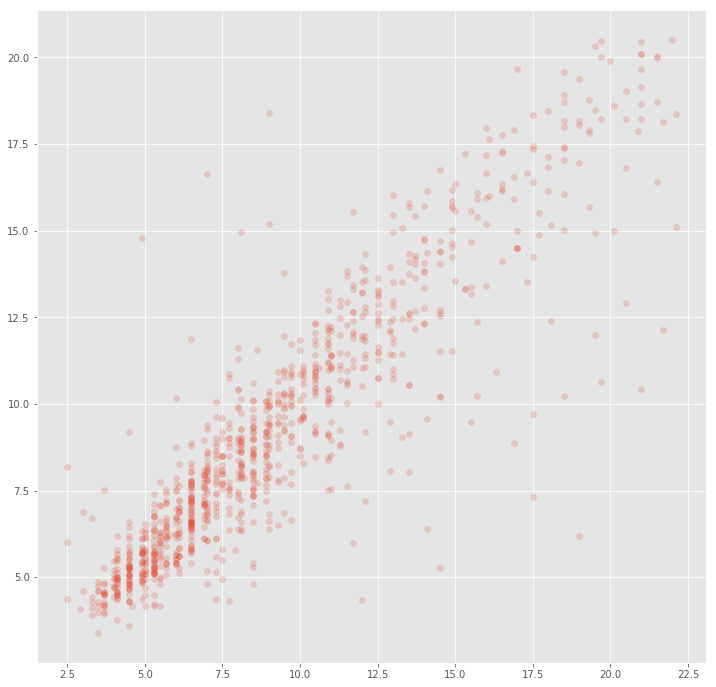

In [45]:
# prediction
prediction = model.predict(xgb.DMatrix(X_test),
                                        ntree_limit=model.best_ntree_limit)
plt.figure(figsize=(12,12))
plt.scatter(y_test[:1000], prediction[:1000], alpha=0.2)
plt.show()

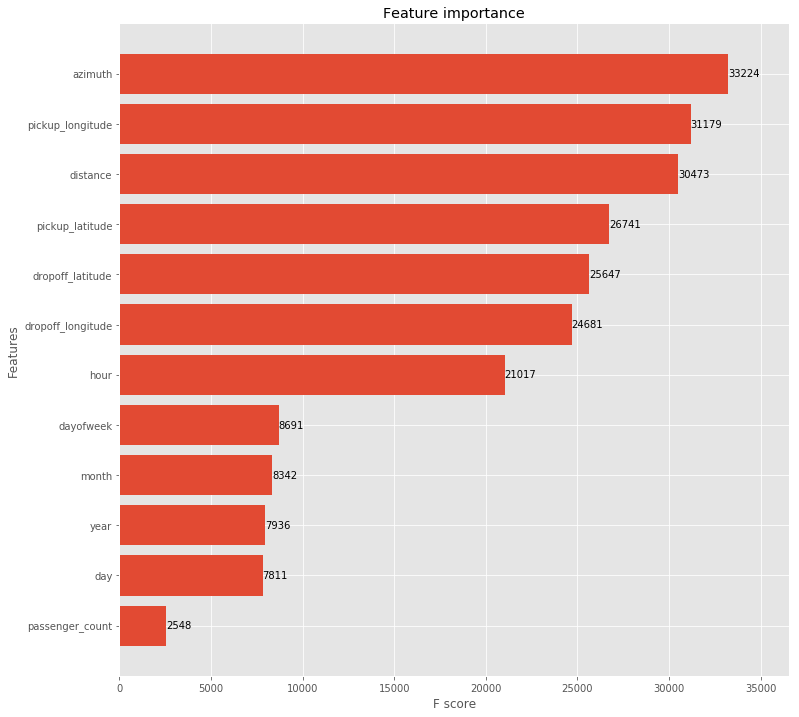

In [46]:
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_importance(model, max_num_features=12, height=0.8, ax=ax)
plt.show()